# Hybrid ARIMA-SVM Model
***

In [13]:
pip install pmdarima

     |████████████████████████████████| 595 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [135]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

***

In [82]:
# Read raw data
oil_data = pd.read_csv('Crude Oil Data/Full_crude_oil_data.csv', index_col = 'Date')
oil_data.drop({'Unnamed: 0'}, inplace = True, axis = 1)
oil_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,83.360001,84.879997,82.739998,84.050003,84.050003,412309
2021-11-02,83.870003,84.410004,82.919998,83.910004,83.910004,429608
2021-11-03,83.070000,83.080002,79.690002,80.860001,80.860001,546577
2021-11-04,80.180000,83.419998,78.250000,78.809998,78.809998,701119
2021-11-05,79.370003,81.800003,78.959999,81.269997,81.269997,531054


***

## ARIMA Model
Reference: [ARIMA Model In Python| Time Series Forecasting #6](https://www.youtube.com/watch?v=8FCDpFhd1zk)

<AxesSubplot:xlabel='Date'>

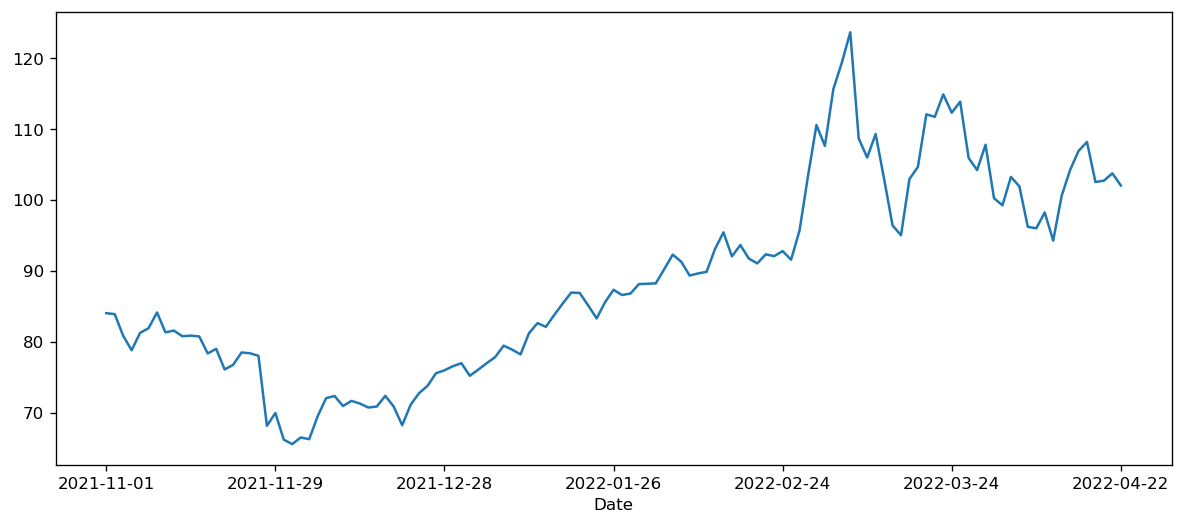

In [83]:
oil_data['Close'].plot(figsize=(12,5))

In [84]:
def ad_test(dataset):
    datatest = adfuller(dataset, autolag = 'AIC')
    print(f'1. ADF : {datatest[0]}')
    print(f'2. P-value : {datatest[1]}')
    print(f'3. Num of Lags : {datatest[2]}')
    print(f'4. Num of observations used for ADF regression and critical value calculation : {datatest[3]}')
    print(f'5. Critical values:')
    for key, val in datatest[4].items():
        print("\t", key, ": ", val)

ad_test(oil_data['Close'])

1. ADF : -0.6614267662936699
2. P-value : 0.856489538209037
3. Num of Lags : 6
4. Num of observations used for ADF regression and critical value calculation : 114
5. Critical values:
	 1% :  -3.489057523907491
	 5% :  -2.887246327182993
	 10% :  -2.5804808802708528


In [85]:
# Figure out order for arima model
stepwise_fit = auto_arima(oil_data['Close'], trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=631.990, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.927, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=633.920, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.236, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.417, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.576 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -314.118
Date:                Fri, 13 May 2022   AIC                            630.236
Time:                        03:22:44   BIC                            633.024
Sample:                             0   HQIC                           631.368
                                - 121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        10.9949      0.850     12.931      0.000       9.328      12.661
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                86.54
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
# Split data to training and testing
training_set, testing_set = train_test_split(oil_data, test_size = 0.2)
#training_set = oil_data.iloc[:-25]
#testing_set = oil_data.iloc[-25:]
training_set.sort_index()
testing_set.sort_index()
# print(oil_data.shape)
# print(training_set.shape, testing_set.shape)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-02,83.870003,84.410004,82.919998,83.910004,83.910004,429608
2021-11-16,80.930000,81.809998,80.029999,80.760002,80.760002,325668
2021-11-19,78.760002,79.919998,75.370003,76.099998,76.099998,623448
2021-11-24,78.480003,79.230003,77.980003,78.389999,78.389999,328848
2021-11-26,78.339996,78.650002,67.400002,68.150002,68.150002,844630
2021-11-29,69.230003,72.930000,68.860001,69.949997,69.949997,675090
2021-12-16,71.480003,72.989998,71.029999,72.379997,72.379997,142541
2021-12-20,70.070000,70.070000,66.040001,68.230003,68.230003,492217
2021-12-23,73.029999,73.949997,72.269997,73.790001,73.790001,270223


In [97]:
# Train the model
model = ARIMA(training_set['Close'], order = (1, 0, 5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   96
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -384.470
Date:                Fri, 13 May 2022   AIC                            784.940
Time:                        03:27:50   BIC                            805.455
Sample:                             0   HQIC                           793.232
                                 - 96                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1773      1.913     46.623      0.000      85.428      92.926
ar.L1          0.3219      0.423      0.761      0.447      -0.507       1.151
ma.L1         -0.2725      0.436     -0.626      0.531      -1.126       0.581
ma.L2         -0.0623      0.114     -0.549      0.583      -0.285       0.160
ma.L3          0.1359      0.102      1.338      0.181      -0.063       0.335
ma.L4         -0.0990      0.119     -0.830      0.406      -0.333       0.135
ma.L5          0.2140      0.109      1.962      0.050       0.000       0.428
sigma2       175.6817     35.206      4.990      0.000     106.680     244.684
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.95   Prob(JB):                         0.19
Heteroskedasticity (H):               0.84   Skew:                             0.15
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
start = len(training_set)
end = len(training_set) + len(testing_set) - 1

pred = model.predict(start = start, end = end, type = 'levels')
pred.index = oil_data.index[start:end+1]
print(pred)

Date
2022-03-18    88.071250
2022-03-21    88.180021
2022-03-22    89.040119
2022-03-23    91.679942
2022-03-24    93.536292
2022-03-25    90.580358
2022-03-28    89.628926
2022-03-29    89.322687
2022-03-30    89.224117
2022-03-31    89.192390
2022-04-01    89.182178
2022-04-04    89.178891
2022-04-05    89.177833
2022-04-06    89.177493
2022-04-07    89.177383
2022-04-08    89.177348
2022-04-11    89.177336
2022-04-12    89.177333
2022-04-13    89.177331
2022-04-14    89.177331
2022-04-18    89.177331
2022-04-19    89.177331
2022-04-20    89.177331
2022-04-21    89.177331
2022-04-22    89.177331
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

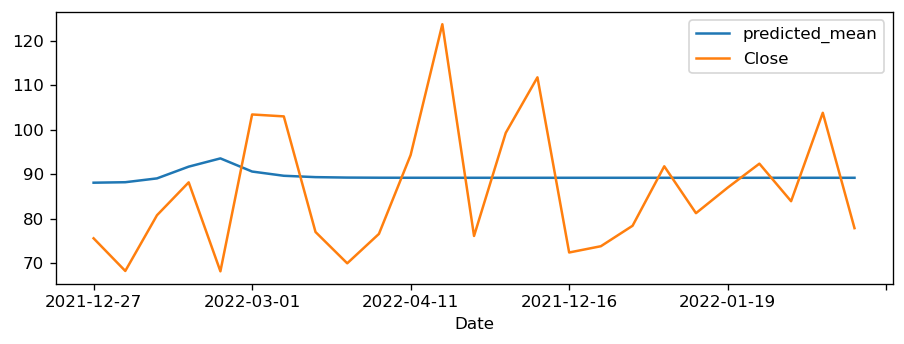

In [99]:
pred.plot(legend = True)
testing_set['Close'].plot(legend=True)

In [100]:
testing_set['Close'].mean()

86.33080017089844

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred, testing_set['Close']))
print(rmse)

14.691884339672159


In [102]:
model2 = ARIMA(oil_data['Close'], order = (1, 0, 5))
model2 = model2.fit()
oil_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-18,107.029999,109.809998,106.000000,108.209999,108.209999,68489
2022-04-19,107.750000,108.919998,102.099998,102.559998,102.559998,71792
2022-04-20,103.050003,104.160004,100.699997,102.750000,102.750000,299028
2022-04-21,102.500000,105.419998,102.010002,103.790001,103.790001,280321
2022-04-22,104.070000,104.220001,101.059998,102.070000,102.070000,246116


2022-04-22    99.269863
2022-04-23    99.408037
2022-04-24    99.326088
2022-04-25    98.515165
2022-04-26    97.934460
                ...    
2022-07-18    89.555240
2022-07-19    89.553272
2022-07-20    89.551435
2022-07-21    89.549717
2022-07-22    89.548113
Freq: D, Name: ARIMA Prediction, Length: 92, dtype: float64


<AxesSubplot:>

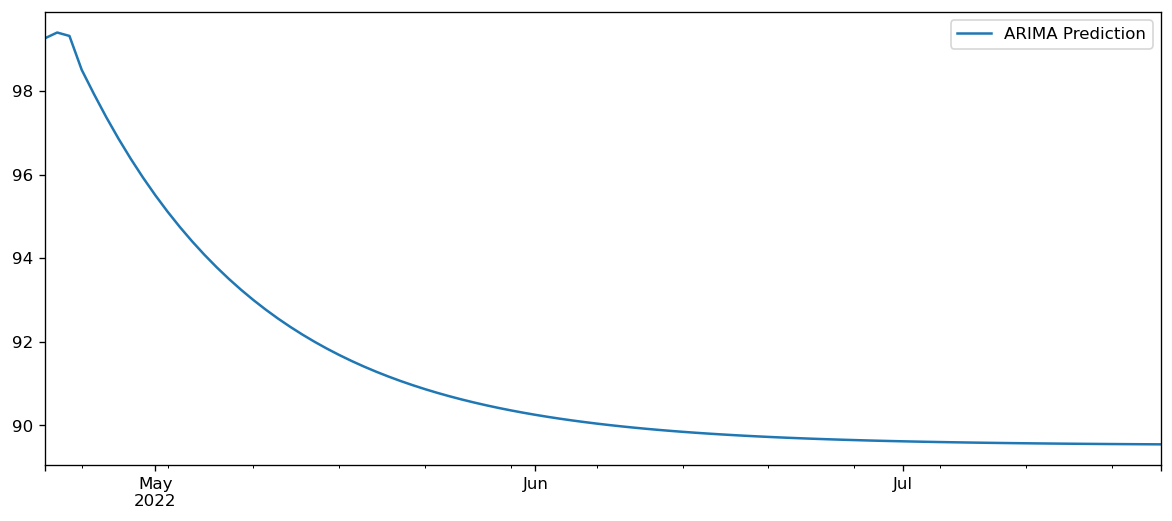

In [109]:
# For future dates
index_future_dates = pd.date_range(start = '2022-04-22', end = '2022-07-22')

pred = model2.predict(start = len(oil_data), end = len(oil_data)+91, type = 'levels').rename('ARIMA Prediction')
pred.index = index_future_dates
print(pred)

pred.plot(figsize = (12,5), legend = True)

***
## Another method of implementing ARIMA
Reference: [How to Create an ARIMA Model for Time Series Forecasting in Python](https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/)

In [193]:
test_result=adfuller(oil_data['Close'])

In [194]:
def adfuller_test(Close):
    result = adfuller(Close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        
adfuller_test(oil_data['Close'])

ADF Test Statistic : -0.6614267662936699
p-value : 0.856489538209037
#Lags Used : 6
Number of Observations : 114


In [195]:
oil_data['ClosePrice First Difference'] = oil_data['Close'] - oil_data['Close'].shift(1)
oil_data['Seasonal First Difference']=oil_data['Close']-oil_data['Close'].shift(12)
oil_data.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrice First Difference,Seasonal First Difference,ClosePrice Second Difference,Seasonal Second Difference,forecast
Date,,,,,,,,,,,
2021-11-01,83.360001,84.879997,82.739998,84.050003,84.050003,412309,NaN,NaN,NaN,NaN,NaN
2021-11-02,83.870003,84.410004,82.919998,83.910004,83.910004,429608,-0.139999,NaN,NaN,NaN,NaN
2021-11-03,83.070000,83.080002,79.690002,80.860001,80.860001,546577,-3.050003,NaN,NaN,NaN,NaN
2021-11-04,80.180000,83.419998,78.250000,78.809998,78.809998,701119,-2.050003,NaN,NaN,NaN,NaN
2021-11-05,79.370003,81.800003,78.959999,81.269997,81.269997,531054,2.459999,NaN,NaN,NaN,NaN


In [196]:
# Again testing if data is stationary
adfuller_test(oil_data['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.076477385666096
p-value : 0.254077736926714
#Lags Used : 13
Number of Observations : 95


<AxesSubplot:xlabel='Date'>

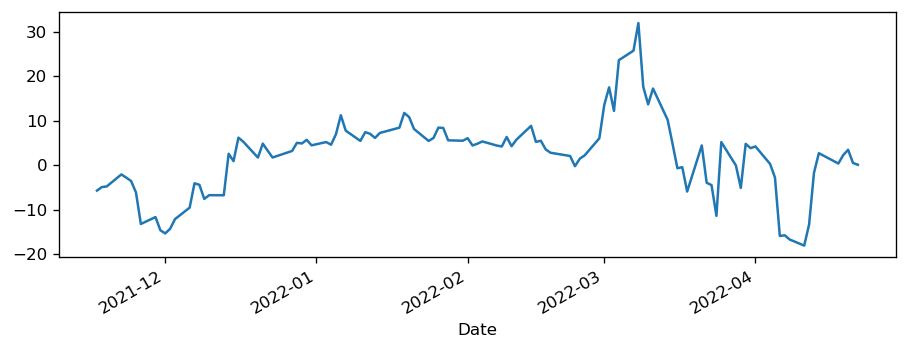

In [197]:
oil_data['Seasonal First Difference'].plot()

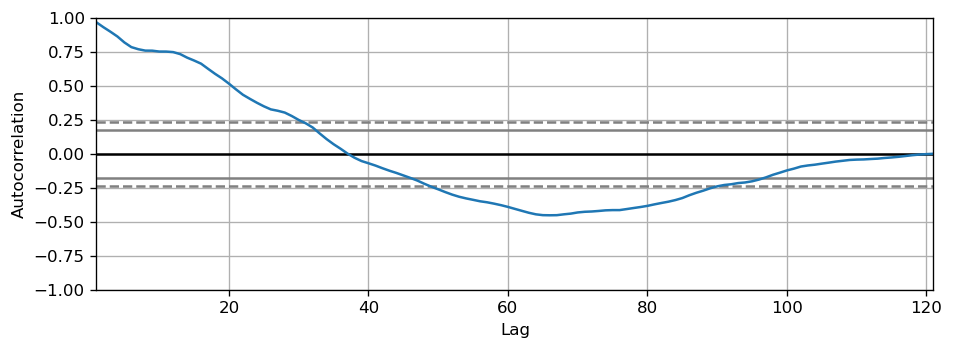

In [198]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oil_data['Close'])
plt.show()

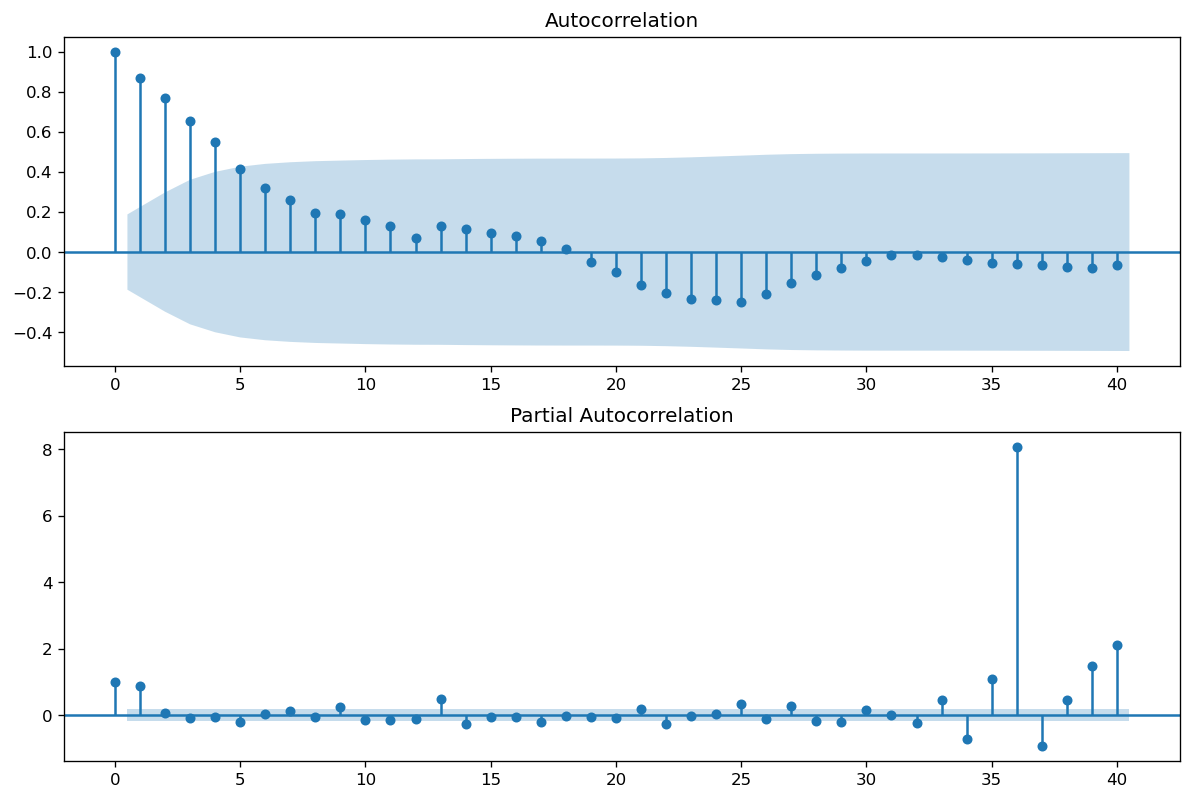

In [199]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(oil_data['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(oil_data['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [200]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

model=ARIMA(oil_data['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  121
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -312.820
Date:                Fri, 13 May 2022   AIC                            631.641
Time:                        04:12:45   BIC                            640.003
Sample:                             0   HQIC                           635.037
                                - 121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9205      0.060    -15.341      0.000      -1.038      -0.803
ma.L1          0.9858      0.038     26.035      0.000       0.912       1.060
sigma2        10.6993      0.878     12.191      0.000       8.979      12.419
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               154.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               4.51   Skew:                            -1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Date'>

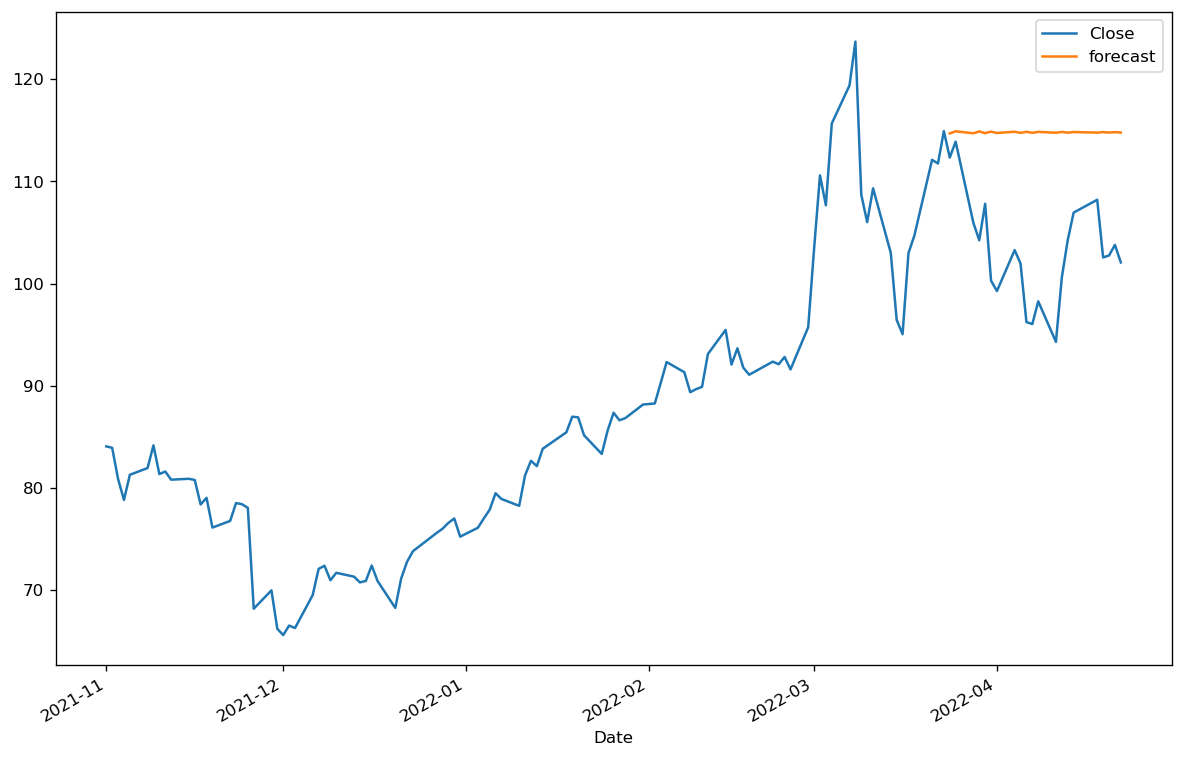

In [201]:
oil_data['forecast']=model_fit.predict(start=100,end=120,dynamic=True)
oil_data[['Close','forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

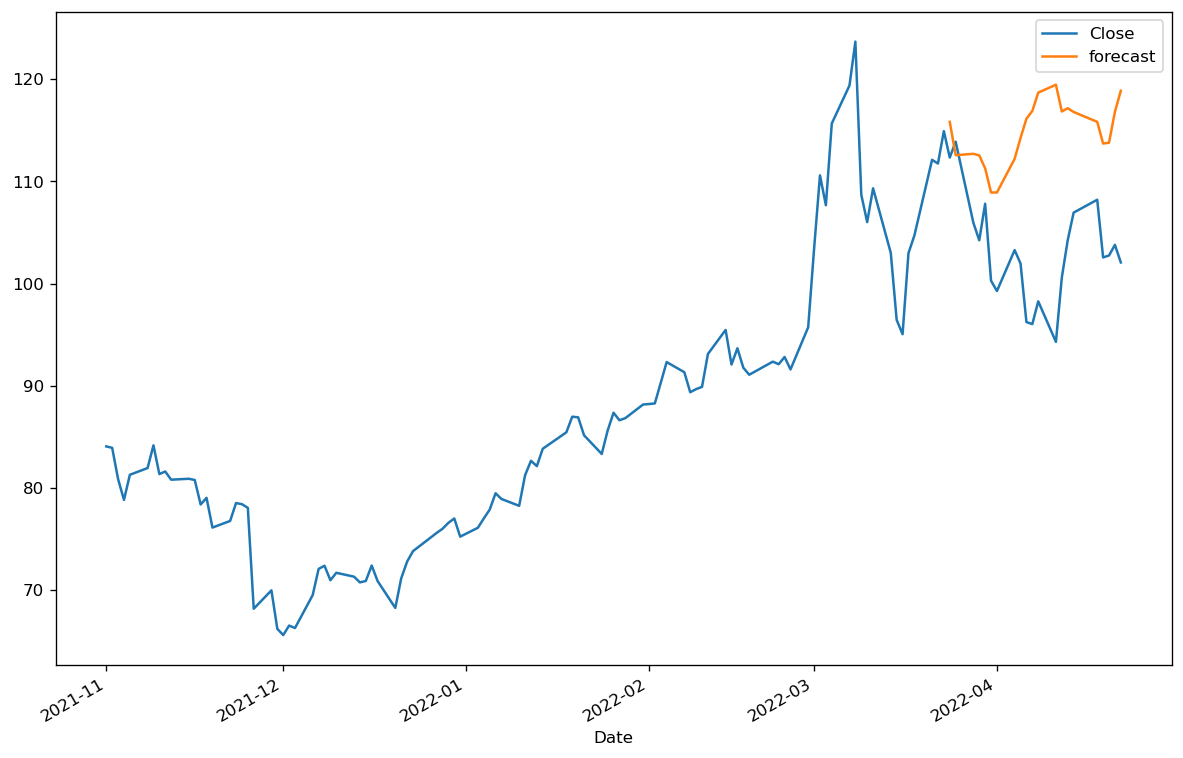

In [202]:
model=sm.tsa.statespace.SARIMAX(oil_data['Close'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results = model.fit(disp=0)
oil_data['forecast'] = results.predict(start=100,end=120,dynamic=True)
oil_data[['Close','forecast']].plot(figsize=(12,8))

In [221]:
from pandas.tseries.offsets import DateOffset
oil_data.index = pd.to_datetime(oil_data.index)
future_dates=[oil_data.index[-1] + DateOffset(days=x)for x in range(0,30)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=oil_data.columns)
future_df=pd.concat([oil_data,future_datest_df])
future_df['forecast'] = results.predict(dynamic= True)
future_df
# future_df[['Close', 'forecast']].plot(figsize=(12, 8))

,Open,High,Low,Close,Adj Close,Volume,ClosePrice First Difference,Seasonal First Difference,ClosePrice Second Difference,Seasonal Second Difference,forecast
2021-11-01,83.360001,84.879997,82.739998,84.050003,84.050003,412309,NaN,NaN,NaN,NaN,0.0
2021-11-02,83.870003,84.410004,82.919998,83.910004,83.910004,429608,-0.139999,NaN,NaN,NaN,0.0
2021-11-03,83.07,83.080002,79.690002,80.860001,80.860001,546577,-3.050003,NaN,NaN,NaN,0.0
2021-11-04,80.18,83.419998,78.25,78.809998,78.809998,701119,-2.050003,NaN,NaN,NaN,0.0
2021-11-05,79.370003,81.800003,78.959999,81.269997,81.269997,531054,2.459999,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
